In [1]:
import numpy as np
import ode
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')
from tqdm import tqdm

1.0

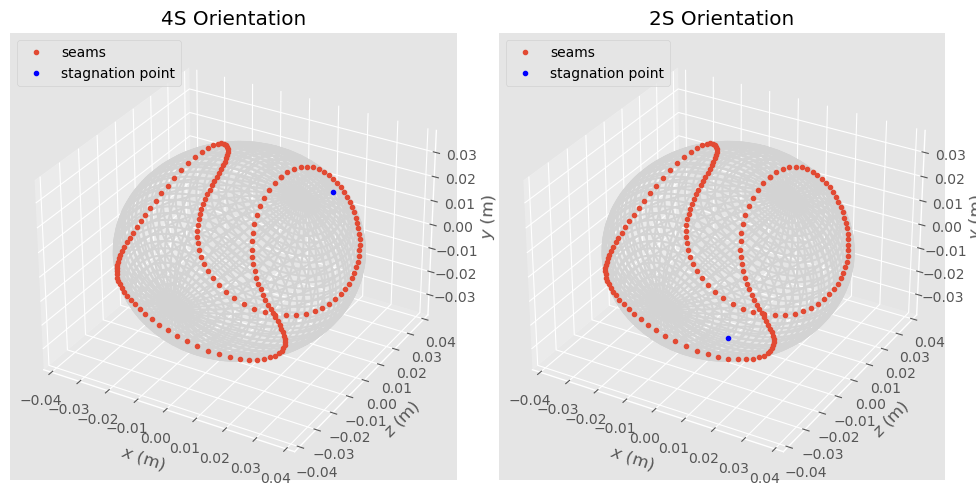

In [2]:
alpha = np.linspace(0,2*np.pi,162) # n=162 number of seams, from source
B = 0.6
F = 1
R = 0.07468/2
# unnormalized points
xu = np.cos(alpha) - B*np.cos(3*alpha)
# yu = np.sin(alpha) + B*np.sin(3*alpha)
# zu = F*np.cos(2*alpha)

zu = np.sin(alpha) + B*np.sin(3*alpha)
yu = F*np.cos(2*alpha)

ru_squared = 1 + B**2 + (F**2-2*B)*(np.cos(2*alpha))**2 + 2*B*(np.sin(2*alpha))**2
ru = np.sqrt(ru_squared)

x = R * xu/ru
y = R * yu/ru
z = R * zu/ru

# draw baseball
u = np.linspace(0, np.pi, 100)
v = np.linspace(0, 2 * np.pi, 100)
x_ball = np.outer(np.sin(u), np.sin(v))
y_ball = np.outer(np.sin(u), np.cos(v))
z_ball = np.outer(np.cos(u), np.ones_like(v))


fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1,projection='3d')
ax1.plot_wireframe(R*x_ball, R*z_ball, R*y_ball,color='lightgray')
ax1.plot(x, z, y, '.', label='seams')

#plot stagnation point (4S)
stag_x = 0.023
stag_z = 0.015
stag_y = 0.023
ax1.plot(stag_x,stag_z,stag_y,'.',color='blue',label = 'stagnation point')

ax1.set_xlabel("$x$ (m)")
ax1.set_ylabel("$z$ (m)")
ax1.set_zlabel("$y$ (m)")
ax1.legend(loc="upper left", numpoints=1)
ax1.figure.tight_layout()
ax1.set_title('4S Orientation')
np.sqrt(stag_x**2+stag_y**2+stag_z**2)/R # checking that the stagnation point is on the surface of the sphere

# same thing, now for 2S orientation
stag_x = 0.
stag_z = 0.
stag_y = -R

ax2 = fig.add_subplot(1,2,2,projection='3d')
ax2.plot_wireframe(R*x_ball, R*z_ball, R*y_ball,color='lightgray')
# ax2.plot(x, y, z, '.', label='seams')
ax2.plot(x, z, y, '.', label='seams')
# ax2.plot(stag_x,stag_y,stag_z,'.',color='blue',label = 'stagnation point')
ax2.plot(stag_x,stag_z,stag_y,'.',color='blue',label = 'stagnation point')


ax2.set_xlabel("$x$ (m)")
ax2.set_ylabel("$z$ (m)")
ax2.set_zlabel("$y$ (m)")
ax2.legend(loc="upper left", numpoints=1)
ax2.figure.tight_layout()
ax2.set_title('2S Orientation')
np.sqrt(stag_x**2+stag_y**2+stag_z**2)/R #checking that the stagnation point is on the surface of the sphere


In [28]:
def C_L_knuckleball(theta,orientation=True):
    if orientation: # 4S orientation
        stag_x = 0.023
        stag_z = 0.015
        stag_y = 0.023
        a0 = 0.0634*3.6
        a1 = 0.0062*3.6
    else: #2S orientation
        stag_x = 0.
        stag_z = 0.
        stag_y = -R
        a0 = 0.1412*1.8
        a1 = 0.0071*1.8
    # vortex shedding term:
    t1 = a0*np.sin(4*theta - np.pi)
    
    # seam term:
    t2 = 0
#     dist_seam = np.zeros(alpha.shape[0]) # distance from stagnation point to each seam
#     s_star = np.zeros(alpha.shape[0]) # z component of seam position
    for s_i in range(alpha.shape[0]):
#         dist_seam[s_i] = np.sqrt((x[s_i]-stag_x)**2 + (y[s_i]-stag_y)**2 + (z[s_i]-stag_z)**2)
        dist_seam_tmp = np.sqrt((x[s_i]-stag_x)**2 + (y[s_i]-stag_y)**2 + (z[s_i]-stag_z)**2)
        s_star = z[s_i]
        d = 2 * R # ball diameter
#     t2 = a1*np.sum(np.sin(np.linalg.norm(dist_seam)*np.pi/(2*d) + np.pi/2) * np.sign(stag_z - s_star))
        sum_term_test = np.sin(np.linalg.norm(dist_seam_tmp)*np.pi/(2*d) + np.pi/2) * np.sign(stag_z - s_star)
        t2 += sum_term_test
    return t1 + a1*t2

def C_L(S):
    return 0.62 * S**0.7

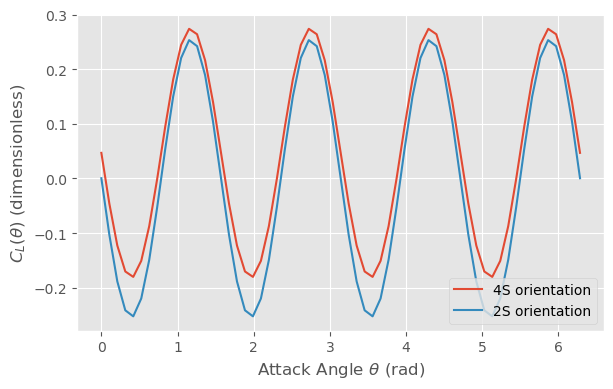

In [29]:
# studying lift term as a function of angle of attack:
# theta_vals = np.arange(0,2*np.pi + np.pi/48,np.pi/48)
theta_vals = np.linspace(0,2*np.pi,61)
lift_4s = np.zeros(len(theta_vals))
lift_2s = np.zeros_like(lift_4s)
for i,theta in enumerate(theta_vals):
    lift_4s[i] = C_L_knuckleball(theta)
    lift_2s[i] = C_L_knuckleball(theta,orientation=False)
    
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(1,2,2)
ax1.plot(theta_vals,lift_4s,label='4S orientation')
ax1.plot(theta_vals,lift_2s,label='2S orientation')
ax1.set_xlabel(r'Attack Angle $\theta$ (rad)')
ax1.figure.tight_layout()
ax1.set_ylabel(r'$C_L(\theta)$ (dimensionless)')
# ax1.set_title('4S Orientation')
# ax2.set_xlabel(r'Attack Angle $\theta$ (rad)')
# ax2.set_ylabel(r'$C_L(\theta)$ (dimensionless)')
# ax2.set_title('2S Orientation')
# ax2.figure.tight_layout()
ax1.legend(loc=4)
# np.max(lift_4s),np.max(lift_2s)

In [ ]:
# a0=0.22824, a1 = 0.2232 (4S)
# a0 = 0.25416, a1 = 0.01278 (2S)

In [55]:
# rewriting simulate_baseball() function for knuckleball
def simulate_knuckleball(v0, omega, theta=np.pi/6,orientation = True, r0=None,
                      h=0.01, C_D=0.40, g=9.81, rho=1.225,
                      r=0.07468/2, m=0.14883,
                      R_homeplate=18.4,magnus = False,knuckleball=False):
    """simulate baseball pitch
    
    Parameters
    ----------
    v0 : array
         initial velocity (vx, vy, vz) in m/s
    omega : array
         angular velocity vector of the ball ("spin"), in rad/s
    theta : float
        angle of attack of the ball
    orientation : boolean, optional
        whether we use 2S or 4S orientation, defaults to 4S
    r0 : array, optional
         initial position of the ball (in m) when it leaves the pitcher's hand
         as (x, y, z); the default is (0, 2, 0)
    h : float, optional
         integration time step in s, default is 0.01 s
    C_D : float, optional
         drag coefficient, default is 0.40
    g : float, optional
         acceleration due to gravity, default 9.81 kg/(m*s^2)
    rho : float, optional
         density of air, default 1.225 kg/m^3
    r : float, optional
         radius of the baseball
    m : float, optional
         mass of the baseball
    R_homeplate : float, optional
         distance of the catcher from the pitcher
         
    Returns
    -------
    
    positions : array
         The array contains an entry (time, x, y, z) for each time step.
    """
    # all SI units (kg, m)
    if r0 is None:
        r0 = np.array([0, 2.0, 0])  # pitching at 2m height
    
    omega = np.asarray(omega)
        
    domega = np.linalg.norm(omega)
    A = np.pi*r**2
    rhoArm = rho * A * r / m
    b2 = 0.5 * C_D * rho * A
    
    a_gravity = np.array([0, -g, 0])

    def f(t, y):
        # y = [x, y, z, vx, vy, vz]
        v = y[3:]
        dv = np.linalg.norm(v)
        S = r*domega/dv
        if knuckleball:
            a_magnus = 0.5 * C_L_knuckleball(theta,orientation=orientation) * rhoArm / S * np.cross(omega, v)
        else:
            a_magnus = 0.5 * C_L(S) * rhoArm / S * np.cross(omega, v)
        a_drag = -b2/m * dv * v
        if magnus:
            a = a_magnus
        else:
            a = a_gravity + a_drag + a_magnus
            
#         theta = np.arctan(y[4]/y[3])
        return np.array([y[3], y[4], y[5],
                         a[0], a[1], a[2]])

    t = 0
    # initialize 3D!
    y = np.array([r0[0], r0[1], r0[2], v0[0], v0[1], v0[2]], dtype=np.float64)
    positions = [[t, y[0], y[1], y[2]]] # record t, x and y, z
    
#     while y[0] < R_homeplate and y[1] >= 0.2:
    while y[0] < R_homeplate and y[1] >= 0: # to compare with other references
        t += h
        y[:] = ode.rk4(y, f, t, h)
        positions.append([t, y[0], y[1], y[2]])  # record t, x and y, z
        theta = np.arctan(y[4]/y[3])
        
    return np.array(positions)

In [62]:
# results for a standard pitch versus knuckleball: 
theta=np.pi/6 #initial value for theta
# theta = np.pi/4
#omega = 50 RPM
omega = 50/60*2*np.pi*np.array([1,1,0]) # rad/s
# r = simulate_knuckleball([30,0,0],omega=0.001*np.array([0,0,1]),r=R,R_homeplate=15)
r = simulate_knuckleball([30,0,0],omega=omega,r=R,R_homeplate=20)
# r2 = simulate_knuckleball([30,0,0],omega=0.001*np.array([0,0,1]),theta=theta,r=R,R_homeplate=15,knuckleball=True)
r2 = simulate_knuckleball([30,0,0],omega=omega,theta=theta,r=R,R_homeplate=20,knuckleball=True)
# r3 = simulate_knuckleball([30,0,0],omega=0.001*np.array([0,0,1]),theta=theta,r=R,R_homeplate=15,orientation=False,knuckleball=True)
r3 = simulate_knuckleball([30,0,0],omega=omega,theta=theta,r=R,R_homeplate=20,orientation=False,knuckleball=True)


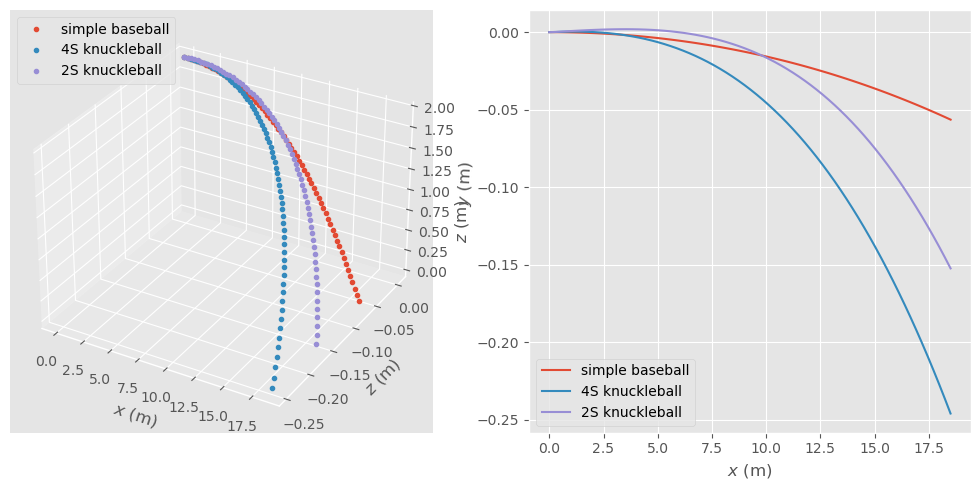

In [63]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.plot(r[:,1], r[:,3], r[:,2], '.', label="simple baseball")
ax1.plot(r2[:,1], r2[:,3], r2[:,2], '.', label="4S knuckleball")
ax1.plot(r3[:,1], r3[:,3], r3[:,2], '.', label="2S knuckleball")
ax1.set_xlabel("$x$ (m)")
ax1.set_ylabel("$z$ (m)")
ax1.set_zlabel("$y$ (m)")
ax1.legend(loc="upper left", numpoints=1)
ax1.figure.tight_layout()
ax2 = fig.add_subplot(1,2,2)
ax2.plot(r[:,1],r[:,3],label="simple baseball")
ax2.plot(r2[:,1],r2[:,3],label="4S knuckleball")
ax2.plot(r3[:,1],r3[:,3],label="2S knuckleball")
ax2.legend()
ax2.set_xlabel('$x$ (m)')
ax2.set_ylabel('$z$ (m)')
ax2.figure.tight_layout()

In [60]:
# displacement from simple basesball (y-direction)
end_z_simple = r[-1][3]
theta_vals = np.arange(0,2*np.pi + np.pi/96,np.pi/96)
# theta_vals = np.arange(0,2*np.pi + np.pi/6,np.pi/6)
end_z_4s = np.zeros_like(theta_vals)
end_z_2s = np.zeros_like(theta_vals)
for i,theta in enumerate(tqdm(theta_vals)):
    r4s = simulate_knuckleball([30,0,0],omega=omega,theta=theta,r=R,R_homeplate=20,knuckleball=True)
    r2s = simulate_knuckleball([30,0,0],omega=omega,theta=theta,r=R,R_homeplate=20,orientation=False,knuckleball=True)
    end_z_4s[i] = r4s[-1][3]
    end_z_2s[i] = r2s[-1][3]


100%|█████████████████████████████████████████| 194/194 [05:08<00:00,  1.59s/it]


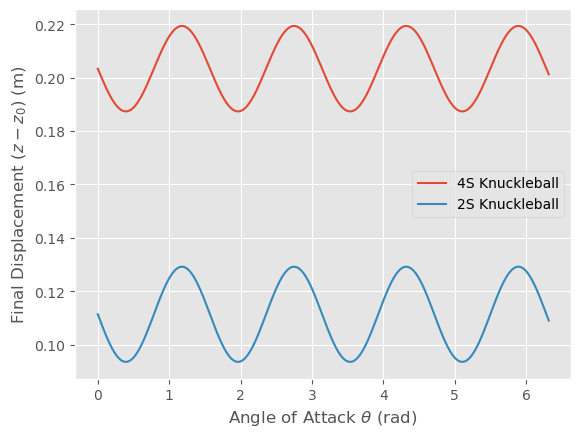

In [68]:
disp_4s = -end_z_4s + end_z_simple
disp_2s = - end_z_2s + end_z_simple

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta_vals,disp_4s,label='4S Knuckleball')
ax.plot(theta_vals,disp_2s,label='2S Knuckleball')
ax.set_xlabel(r'Angle of Attack $\theta$ (rad)')
ax.set_ylabel(r'Final Displacement $(z - z_0)$ (m)')
ax.legend()